# Рынок заведений общественного питания Москвы

**Цель проекта**

1. Изучить характеристики заведений общественного питания (особенности сетевых и несетевых заведений, число посадочных мест)
2. Исследовать наиболее и наименее популярные улицы и районы через которые они проходят по числу заведений


# Структура проекта

**Шаг №1. Загрузить данные и подготовить их к анализу**
* Загрузить данные о заведениях общественного питания Москвы. 
* Убедиться, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.

**Шаг №2. Анализ данных**

**Задача**

1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
3. Для какого вида объекта общественного питания характерно сетевое распространение?
4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
6. Выделите в отдельный столбец информацию об улице из столбца address .
7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

**Цель:**
Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.

**Шаг №3. Подготовка презентации**

Необходимо подготовить презентацию исследования для инвесторов. Отправить презентацию нужно обязательно в формате pdf.

**Оглавление:**
<a id='section_id'></a>

1. [Импортирование библиотек](#section_id1)

* [Обзор данных](#section_id1_1)

* [Предобработка данных](#section_id1_2)

2. [Анализ данных](#section_id2)

3. [Общий вывод](#section_id3)


## Импортирование библиотек и загрузка данных
<a id='section_id1'></a>

In [1]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import requests
import json
from io import BytesIO

In [2]:
# форматирую вывод графиков
sns.set(rc={'figure.figsize':(10, 4)})
sns.set_style('whitegrid')
#xticks(rotation=45)
pd.options.display.max_colwidth = 50
# Причёсываю формат отображения данных - отображение всех колонок и ограничиваю количество знаков после запятой
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

# Дополнительный внешний источник для задания 2.7
spreadsheet_id = '1cERosnQYeTJgl395jRCwZmSQ6KaWMVkMrPJt1pjposE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

### Обзор данных
<a id='section_id1_1'></a>

In [4]:
rest_data.head(3)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95


In [5]:
rest_data.tail(3)

,id,object_name,chain,object_type,address,number
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


In [6]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [7]:
rest_data[['number']].describe()

,number
count,"15,366.00"
mean,59.55
std,74.74
min,0.00
25%,12.00
50%,40.00
75%,80.00
max,"1,700.00"


In [8]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [9]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

**Вывод:**

В датафрейме находится информация об объектах общественного питания.
* Тип данных корректный
* Пропусков нет
* Дубликатов в колонках `chain` и `object_type` нет
* В ходе предобработки данных приведу названия объектов и адреса к нижнему регистру, на случай если в них есть дубликаты.
* Заменю длинные наименования типов заведений на короткие для удобства
* Объекты сильно различаются по количеству посадочных мест, стандартное отклонение 74.7, есть объект с 1 700 посадочных мест, при том, что медиана находится на уровне 40. При анализе отдельно обращу на это внимание.
* Посмотрю на заведения с 0 посадочных мест
* Проверю дубликаты

В остальном, на первый взгляд с данными всё в порядке.

### Предобработка данных
<a id='section_id1_2'></a>

[Оглавление](#section_id)

In [10]:
# Приведу данные к нижнему регистру:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

# Замена длинный наименований типов объектов на короткие:
rest_data.loc[rest_data['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'фаст фуд'
rest_data.loc[rest_data['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'кулинария'

# Проверка:
rest_data.head(3)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95


#### Унификация названий

In [11]:
rest_data.loc[pd.Series(rest_data['object_name']).str.contains('кфс|kfc', regex=True), 'object_name'] = 'kfc'
rest_data.loc[pd.Series(rest_data['object_name']).str.contains('starbucks|старбакс', regex=True), 'object_name'] = 'starbucks'
rest_data.loc[pd.Series(rest_data['object_name']).str.contains("доминос|домино'с", regex=True), 'object_name'] = 'доминос'
rest_data.loc[pd.Series(rest_data['object_name']).str.contains("il патио|иль патио|планета суши", 
                                                               regex=True), 'object_name'] = 'il патио/планета суши'

rest_data.loc[rest_data['object_name'].str.contains('мята lounge'), 'object_name'] = 'мята lounge'
rest_data.loc[rest_data['object_name'].str.contains('милти'), 'object_name'] = 'милти'
rest_data.loc[rest_data['object_name'].str.contains('тануки'), 'object_name'] = 'тануки'
rest_data.loc[rest_data['object_name'].str.contains('fridays'), 'object_name'] = 'фрайдис'
rest_data.loc[rest_data['object_name'].str.contains('ваби'), 'object_name'] = 'ваби-саби'
rest_data.loc[rest_data['object_name'].str.contains('бургер кинг'), 'object_name'] = 'бургер кинг'
rest_data.loc[rest_data['object_name'].str.contains('якитория'), 'object_name'] = 'якитория'
rest_data.loc[rest_data['object_name'].str.contains('прайм стар'), 'object_name'] = 'прайм стар'
rest_data.loc[rest_data['object_name'].str.contains('джон джоли'), 'object_name'] = 'джон джоли'
rest_data.loc[rest_data['object_name'].str.contains('папа джонс'), 'object_name'] = 'папа джонс'
rest_data.loc[rest_data['object_name'].str.contains('макдоналдс'), 'object_name'] = 'mcdonalds'
rest_data.loc[rest_data['object_name'].str.contains('штолле'), 'object_name'] = 'штолле'
rest_data.loc[rest_data['object_name'].str.contains('крошка картошка'), 'object_name'] = 'крошка картошка'
rest_data.loc[rest_data['object_name'].str.contains('пицца хат'), 'object_name'] = 'пицца хат'
rest_data.loc[rest_data['object_name'].str.contains('сабвей'), 'object_name'] = 'subway'

#### Категории заведений по названиям сетей
Посмотрю категории заведений по названию сети.

In [12]:
rest_data_pvt = rest_data.query('chain == "да"')
rest_data_pvt = rest_data_pvt.pivot_table(index = 'object_name', columns='object_type', 
                                          values='number', aggfunc='count').fillna(0)
rest_data_pvt['total'] = rest_data_pvt[['бар', 'буфет', 'закусочная', 'кафе', 'кафетерий', 'кулинария', 
                                        'ресторан', 'столовая', 'фаст фуд']].sum(axis=1)
rest_data_pvt.sort_values(by='total', ascending=False).head(15)

object_type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,столовая,фаст фуд,total
object_name,,,,,,,,,,
kfc,0.00,0.00,1.00,31.00,0.00,0.00,34.00,0.00,122.00,188.00
mcdonalds,0.00,0.00,0.00,25.00,0.00,0.00,31.00,0.00,117.00,173.00
бургер кинг,1.00,0.00,5.00,26.00,0.00,0.00,16.00,0.00,111.00,159.00
шоколадница,1.00,0.00,0.00,150.00,0.00,0.00,5.00,0.00,1.00,157.00
доминос,0.00,0.00,2.00,56.00,0.00,0.00,9.00,0.00,32.00,99.00
крошка картошка,0.00,1.00,4.00,24.00,0.00,0.00,3.00,0.00,64.00,96.00
теремок,0.00,2.00,6.00,25.00,0.00,0.00,6.00,0.00,55.00,94.00
милти,0.00,2.00,5.00,9.00,1.00,31.00,1.00,0.00,32.00,81.00
суши wok,2.00,0.00,3.00,35.00,0.00,10.00,0.00,0.00,22.00,72.00


У топ-10 заведений наблюдается большой разброс по категориям. При чём если по шоколаднице основная часть заведений приходится на кафе, что логично, то у 3 лидеров (КФС, макдональдс и бургер кинг) примерно 30% заведений не относятся к фастфуду. 

Приведу тип заведений по ТОП-10 сетям к одному виду. Там где непонятно какой тип должен соответствовать заведению, приму "большинство" за верную категорию.   

In [13]:
# Для унификации типов заведений использую лямбду функцию
rest_data.loc[rest_data['chain'] == 'да', 'object_type'] = rest_data\
    .loc[rest_data['chain'] == 'да'].groupby('object_name')['object_type']\
    .transform(lambda x : x.mode()[0] if len(x.mode()) else x)

# Проверю результат после применения функции
rest_data_pvt = rest_data.query('chain == "да"')
rest_data_pvt = rest_data_pvt.pivot_table(index = 'object_name', columns='object_type', 
                                          values='number', aggfunc='count').fillna(0)
rest_data_pvt['total'] = rest_data_pvt[['бар', 'буфет', 'закусочная', 'кафе', 'кафетерий', 'кулинария', 
                                        'ресторан', 'фаст фуд']].sum(axis=1)
rest_data_pvt.sort_values(by='total', ascending=False).head(15)

object_type,бар,буфет,закусочная,кафе,кафетерий,кулинария,ресторан,фаст фуд,total
object_name,,,,,,,,,
kfc,0.00,0.00,0.00,0.00,0.00,0.00,0.00,188.00,188.00
mcdonalds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,173.00,173.00
бургер кинг,0.00,0.00,0.00,0.00,0.00,0.00,0.00,159.00,159.00
шоколадница,0.00,0.00,0.00,157.00,0.00,0.00,0.00,0.00,157.00
доминос,0.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,99.00
крошка картошка,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96.00,96.00
теремок,0.00,0.00,0.00,0.00,0.00,0.00,0.00,94.00,94.00
милти,0.00,0.00,0.00,0.00,0.00,0.00,0.00,81.00,81.00
суши wok,0.00,0.00,0.00,72.00,0.00,0.00,0.00,0.00,72.00


Посмотрю на долю заведений с 0 посадочных мест в разрезе типов заведений 

In [14]:
rest_data_pvt = rest_data.pivot_table(index='object_type', values='id', aggfunc='count').rename(columns={
    'id':'full_numbers'
}).reset_index()
rest_data_zero_number = rest_data.query('number==0')\
    .pivot_table(index='object_type', values='id', aggfunc='count').rename(columns={
    'id': 'zero_numbers'
}).reset_index()
rest_data_zero_number = rest_data_zero_number.merge(rest_data_pvt, on='object_type', how='left')
rest_data_zero_number['zero_numbers_share'] = (rest_data_zero_number['zero_numbers'] 
                                               / rest_data_zero_number['full_numbers'] * 100)
rest_data_zero_number

,object_type,zero_numbers,full_numbers,zero_numbers_share
0,бар,28,846,3.31
1,буфет,60,576,10.42
2,закусочная,175,317,55.21
3,кафе,308,6188,4.98
4,кафетерий,98,356,27.53
5,кулинария,112,203,55.17
6,ресторан,31,2158,1.44
7,столовая,19,2584,0.74
8,фаст фуд,790,2138,36.95


In [15]:
# Посмотрю на часть таких заведений:
rest_data[rest_data['number'] ==0]

,id,object_name,chain,object_type,address,number
137,115498,пекарня & донер,нет,закусочная,"город москва, бутырская улица, дом 9, корпус 2",0
154,152556,шаурма в пите,нет,фаст фуд,"город москва, варшавское шоссе, дом 72, корпус 2",0
157,149568,суши,нет,фаст фуд,"город москва, улица маршала василевского, дом ...",0
190,126956,"шаурма, куры-гриль",нет,фаст фуд,"город москва, 1-я владимирская улица, дом 21",0
195,149531,"шаурма, куры-гриль",нет,фаст фуд,"город москва, 2-я владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,милти,да,фаст фуд,"город москва, дубравная улица, дом 34/29",0
15335,211221,милти,да,фаст фуд,"город москва, пятницкое шоссе, дом 3",0
15336,211209,милти,да,фаст фуд,"город москва, ореховый бульвар, дом 22а",0
15337,208477,милти,да,фаст фуд,"город москва, 3-й крутицкий переулок, дом 18",0


Есть категории заведений с большой долей отсутствия посадочных мест. Насколько понимаю, эти заведения и не предполагают их наличие. Например заведение милти - готовит и само доставляет еду, тоже самое касается шаурмичных и пекарен. 

In [16]:
# Проверю наличие явных дубликатов
print(rest_data.duplicated().sum())

# Проверю явные дубликаты без столбца 'id'
print('Явные дубликаты без столбца "id":', 
      rest_data[['object_name','chain', 'object_type', 'address','number']].duplicated().sum())

0
Явные дубликаты без столбца "id": 87


In [17]:
# Удалю дубликаты, исключив столбец id:
rest_data = rest_data.drop_duplicates(subset=rest_data.columns.difference(['id']))

# Повторно проверю наличие явных дубликатов
rest_data[['object_name','chain', 'object_type', 'address','number']].duplicated().sum()

0

#### Внешний источник данных (районы)

In [18]:
# В датафрейме из дополнительного источника приведу названия к нижнему регистру
df.columns = df.columns.str.lower()
df['address'] = df['address'].str.lower()
df['name'] = df['name'].str.lower()
df.head(2)

,id,name,global_id,isnetobject,operatingcompany,typeobject,admarea,district,address,publicphone,seatscount,socialprivileges,longitude_wgs84,latitude_wgs84,id_en,name_en,isnetobject_en,operatingcompany_en,typeobject_en,admarea_en,district_en,address_en,publicphone_en,seatscount_en,socialprivileges_en,longitude_wgs84_en,latitude_wgs84_en,geodata_center,geoarea
0,151635,сметана,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город москва, улица егора абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.71,55.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77874,родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город москва, улица талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.67,55.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15279 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15279 non-null  int64 
 1   object_name  15279 non-null  object
 2   chain        15279 non-null  object
 3   object_type  15279 non-null  object
 4   address      15279 non-null  object
 5   number       15279 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.6+ KB


Создам бэкап для дальнейшего анализа, а также сразу добавлю название района по названию и адресу и числу посадочных мест (потребуется для анализа)

In [20]:
rest = copy.deepcopy(rest_data.merge(df[['name', 'address', 'district', 'seatscount']].drop_duplicates(), 
                                     left_on=['object_name','address', 'number'], 
                                     right_on=['name', 'address', 'seatscount'], how='left'))

rest = rest[['object_name', 'chain', 'object_type', 'address', 'number', 'district']]
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15279 entries, 0 to 15278
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15279 non-null  object
 1   chain        15279 non-null  object
 2   object_type  15279 non-null  object
 3   address      15279 non-null  object
 4   number       15279 non-null  int64 
 5   district     4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 835.6+ KB


Не по всем объектам подтянулся район, думаю, это не будет проблемой при анализе.

In [21]:
rest[rest['district'].isnull()]

,object_name,chain,object_type,address,number,district
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,NaN
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,NaN
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,NaN
5,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,NaN
8,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,NaN
...,...,...,...,...,...,...
15269,шоколадница,да,кафе,"город москва, митинская улица, дом 36, корпус 1",100,NaN
15270,шоколадница,да,кафе,"город москва, площадь джавахарлала неру, дом 1",30,NaN
15272,кофейня «шоколадница»,да,кафе,"город москва, кантемировская улица, дом 47",72,NaN
15276,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,NaN


**Вывод:**

Значения приведены к нижнему регистру, унифицировал часть названий и типы объектов. Смущает, что Starbucks попал не в кафетерий, а в кафе, но править данные не хочется, чтобы не искажать анализ.

Подтянул в датафрейм район из внешнего источника.

Явных дубликатов нет.
Можно приступать к анализу.

## Анализ данных
<a id='section_id2'></a>

### Виды объектов по количеству

Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

[Оглавление](#section_id)

In [22]:
quantity = rest[['object_type', 'object_name']].groupby('object_type').count()\
   .sort_values(by='object_name', ascending=False).reset_index()
quantity

,object_type,object_name
0,кафе,6159
1,столовая,2581
2,ресторан,2155
3,фаст фуд,2111
4,бар,845
5,буфет,567
6,кафетерий,353
7,закусочная,305
8,кулинария,203


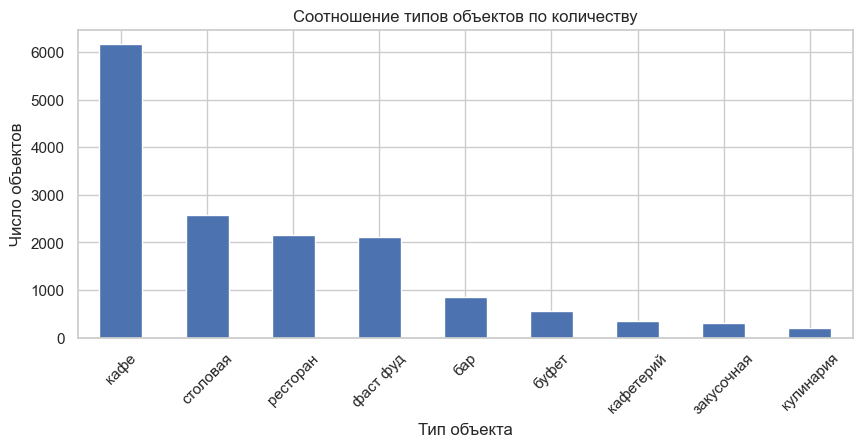

In [23]:
quantity.plot(kind='bar', x='object_type', legend=False, title='Соотношение типов объектов по количеству')

plt.xlabel('Тип объекта')
plt.ylabel('Число объектов')
plt.xticks(rotation=45)
plt.show()

Посчитаю долю каждого типа заведений

In [24]:
quantity['type_share'] = quantity['object_name'] / quantity['object_name'].sum()  * 100 
quantity

,object_type,object_name,type_share
0,кафе,6159,40.31
1,столовая,2581,16.89
2,ресторан,2155,14.10
3,фаст фуд,2111,13.82
4,бар,845,5.53
5,буфет,567,3.71
6,кафетерий,353,2.31
7,закусочная,305,2.00
8,кулинария,203,1.33


**Вывод:**

Есть явный лидер по количеству объектов - кафе, их около 6 тыс. штук. Далее с большим отрывом идут объекты второго эшелона - столовые, фаст фуд и рестораны.  

### Сетевые и несетевые заведения по количеству

Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

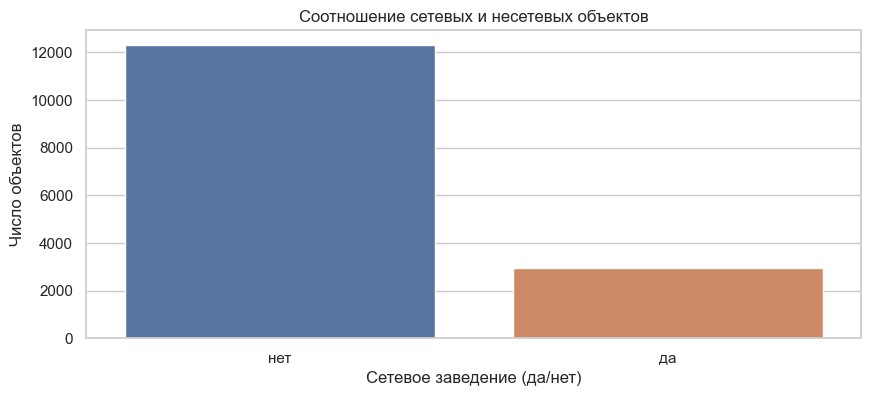

In [25]:
net = copy.deepcopy(rest)

net = net[['object_name', 'chain']].groupby(['chain']).agg({'object_name':'count'})\
   .sort_values(by='object_name', ascending=False).reset_index()

ax = sns.barplot(x='chain', y='object_name', data=net)

ax.set_xlabel('Сетевое заведение (да/нет)')    
ax.set_ylabel('Число объектов')
ax.set_title('Соотношение сетевых и несетевых объектов')
plt.show()

**Вывод:**

Несетевых заведений гораздо больше. В следующем задании посмотрю как распределяются сетевые и несетвые заведения по типам.

### Ключевой вид объекта для сети

Для какого вида объекта общественного питания характерно сетевое распространение?

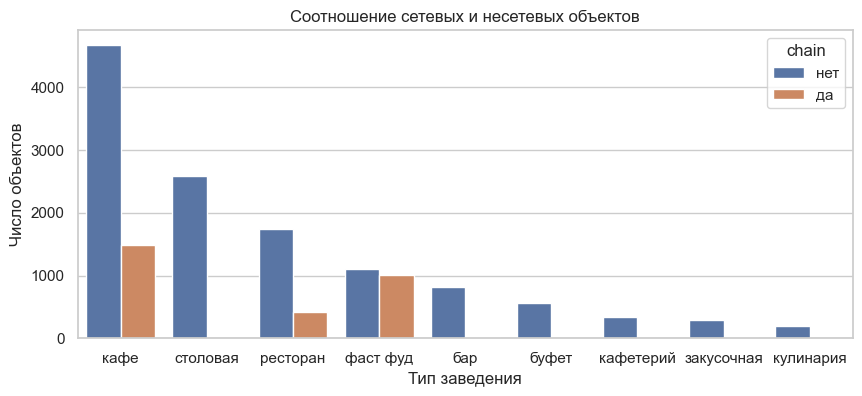

In [26]:
net = copy.deepcopy(rest)

net = net[['object_type', 'object_name', 'chain']].groupby(['object_type', 'chain']).agg({'object_name':'count'})\
   .sort_values(by='object_name', ascending=False).reset_index()

ax = sns.barplot(x='object_type', y='object_name', data=net, hue='chain')\

ax.set_xlabel('Тип заведения')    
ax.set_ylabel('Число объектов')
ax.set_title('Соотношение сетевых и несетевых объектов')
plt.show()

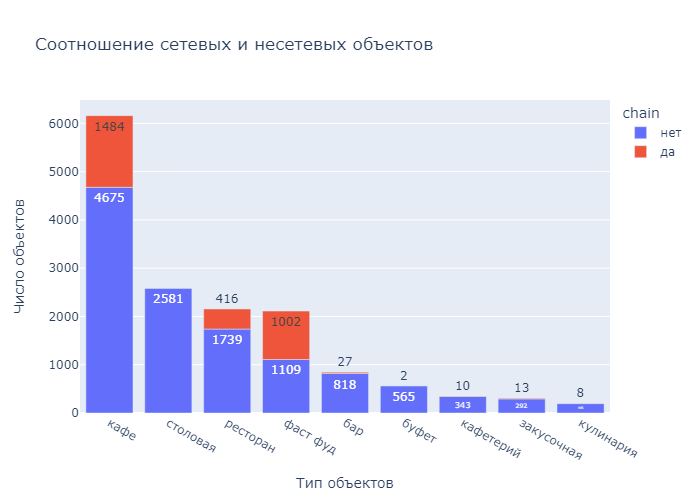

In [27]:
# Построю альтернативные интерактивные графики через plotly
net = rest[['object_type', 'object_name', 'chain']].groupby(['object_type', 'chain']).agg({'object_name':'count'})\
   .rename(columns={'object_name':'object_amount'}).sort_values(by='object_amount', ascending=False).reset_index()

ax = px.bar(net, x='object_type', y='object_amount', color='chain', 
            title='Соотношение сетевых и несетевых объектов', text_auto=True, 
           labels={'object_type':'Тип объектов', 'object_amount':'Число объектов'})
ax.show('png')

**Вывод:**

Наиболее характерно сетевое распространение для фаст фуда (почти поровну сетевых и несетевых заведений), кафе и ресторанов. Тем не менее, количество несетевых заведений существенно превышает сетевые.

### Сети - количество и посадочные места

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Для ответа на вопрос добавлю категоризированную колонку с критериями в зависимости от числа посадочных мест и количества заведений в сети:

* мало заведений и мало мест 
* много заведений и мало мест
* мало заведений и много мест 
* много заведений и много мест

Для критерия с посадочными местами использую колонку `number`, для количества заведений - посчитаю в отдельном датафрейме количество объектов, агрегированных по названию и замёрджу в основной датафрейм. Далее напишу функцию с добавлением категорий в зависимости от информации.

In [28]:
# Введу переменную где оставлю только сетевые объекты:
chain = copy.deepcopy(rest[rest['chain'] == 'да'])

# Посчитаю количество заведений, агрегированных по названию
object_count = rest.groupby('object_name').agg({'object_type':'count'}).sort_values(by='object_type', ascending=False)\
    .rename(columns={'object_type':'object_count'}).reset_index()

# Добавлю количество заведений к датафрейму, далее по количеству заведений будет присваиваться критерий для графика
chain = chain.merge(object_count, on = 'object_name', how='left')
chain.head(3)

,object_name,chain,object_type,address,number,district,object_count
0,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,NaN,2
1,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,район Арбат,8
2,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32,NaN,15


In [29]:
# Посмотрю на полученный датафрейм:
chain.describe()

,number,object_count
count,"2,962.00","2,962.00"
mean,53.00,66.74
std,57.16,64.78
min,0.00,1.00
25%,15.00,7.00
50%,40.00,47.00
75%,72.00,101.00
max,580.00,192.00


Для критериев много / мало использую данные 1ого квартиля: всё что меньше или равно - мало, больше - много. 

In [30]:
def category_chain(row):
    seats = row['number']
    count = row['object_count']
    if (count <= chain['object_count'].quantile(0.25)) & (seats <= chain['number'].quantile(0.25)):
        return 'мало заведений и мало мест'
    elif (count > chain['object_count'].quantile(0.25)) & (seats <= chain['number'].quantile(0.25)):
        return 'много заведений и мало мест'
    elif (count <= chain['object_count'].quantile(0.25)) & (seats > chain['number'].quantile(0.25)):
        return 'мало заведений и много мест'
    elif (count > chain['object_count'].quantile(0.25)) & (seats > chain['number'].quantile(0.25)):
        return 'много заведений и много мест'

In [31]:
chain['category'] = chain.apply(category_chain, axis=1)
chain.head(4)

,object_name,chain,object_type,address,number,district,object_count,category
0,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,NaN,2,мало заведений и много мест
1,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,район Арбат,8,много заведений и мало мест
2,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32,NaN,15,много заведений и много мест
3,суши wok,да,кафе,"город москва, азовская улица, дом 3",7,NaN,72,много заведений и мало мест


In [32]:
# Проверю, что не осталось пустых строк:
chain['category'].unique()

array(['мало заведений и много мест', 'много заведений и мало мест',
       'много заведений и много мест', 'мало заведений и мало мест'],
      dtype=object)

In [33]:
# Посмотрю на агрегированную информацию по категориям:
chain.groupby('category').agg({'object_count':'count', 'number':'sum'}).reset_index()

,category,object_count,number
0,мало заведений и мало мест,163,1022
1,мало заведений и много мест,604,47046
2,много заведений и мало мест,621,3589
3,много заведений и много мест,1574,105329


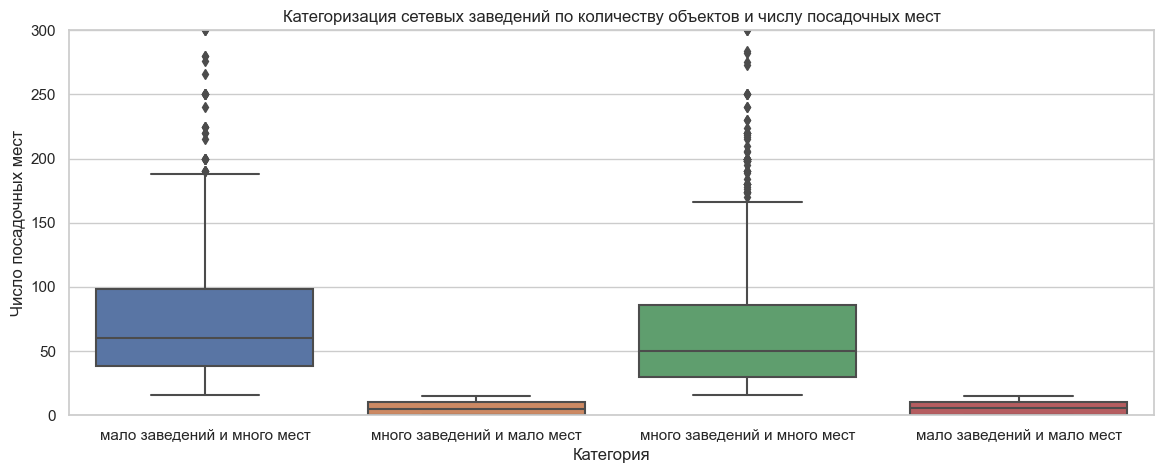

In [34]:
plt.subplots(figsize=(14, 5))
sns.boxplot(x='category', y='number', data=chain).set_ylim(0, 300)
plt.xlabel('Категория')
plt.ylabel('Число посадочных мест')
plt.title('Категоризация сетевых заведений по количеству объектов и числу посадочных мест')
plt.show()

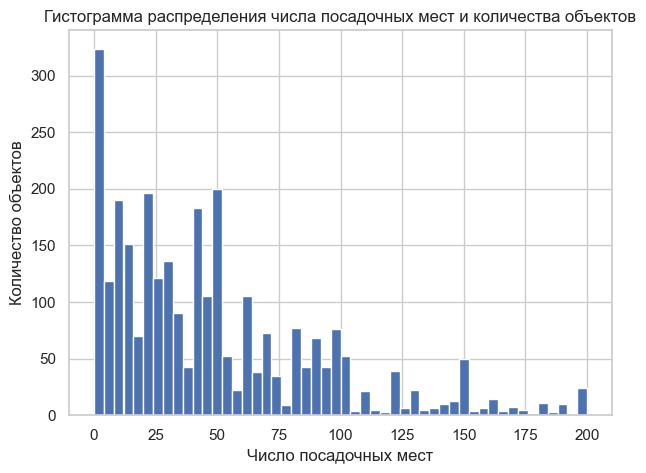

In [35]:
plt.subplots(figsize=(7, 5))
chain['number'].hist(bins=50, range=(0, 200))

plt.xlabel('Число посадочных мест')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения числа посадочных мест и количества объектов')

plt.show()

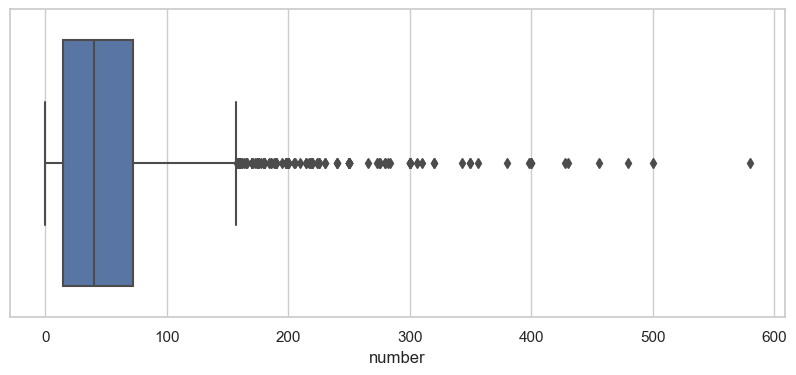

In [36]:
sns.boxplot(x=chain['number'])
plt.show()

**Вывод:**

Более распространены сетевые заведения в категории много заведений с большим количеством посадочных мест.

Категоризирую заведения по количеству объектов и числу мест, присвоив значения `мало`, `средне` и `много`. Использую функцию `qcut`

In [37]:
# Посчитаю среднее число мест по объектам, сгруппированным по названиям
chain_rest = rest[rest['chain'] == 'да'].groupby('object_name').agg(obj_count=('object_type','count'), 
         seats=('number','mean'))[lambda x : x['obj_count'] > 1].reset_index()

# Категории для заведений:
category_obj = ['мало заведений', 'средне заведений', 'много заведений']
chain_rest['category_obj'] = pd.qcut(chain_rest['obj_count'], q = [0, 1/3, 2/3, 1],
                           labels=category_obj)
# Категории для числа мест:
category_seats = ['мало мест', 'средне мест', 'много мест']
chain_rest['category_seats'] = pd.qcut(chain_rest['seats'], q = [0, 1/3, 2/3, 1],
                           labels=category_seats)
# Столбец, объединяющий в единую категорию:
chain_rest['category'] = chain_rest['category_obj'].astype(str) + ', ' + chain_rest['category_seats'].astype(str)
chain_rest.head(4)

,object_name,obj_count,seats,category_obj,category_seats,category
0,bocconcino,3,66.67,мало заведений,средне мест,"мало заведений, средне мест"
1,burger club,3,20.33,мало заведений,мало мест,"мало заведений, мало мест"
2,coffeeshop company,4,47.25,средне заведений,средне мест,"средне заведений, средне мест"
3,cofix,25,9.60,много заведений,мало мест,"много заведений, мало мест"


In [38]:
chain_rest.groupby('category')\
    .agg({'obj_count':'count', 'seats':'sum'}).reset_index()

,category,obj_count,seats
0,"мало заведений, мало мест",32,514.67
1,"мало заведений, много мест",36,"4,401.67"
2,"мало заведений, средне мест",31,"1,453.67"
3,"много заведений, мало мест",22,298.16
4,"много заведений, много мест",16,"1,887.42"
5,"много заведений, средне мест",22,930.21
6,"средне заведений, мало мест",15,240.03
7,"средне заведений, много мест",17,"1,975.80"
8,"средне заведений, средне мест",15,738.83


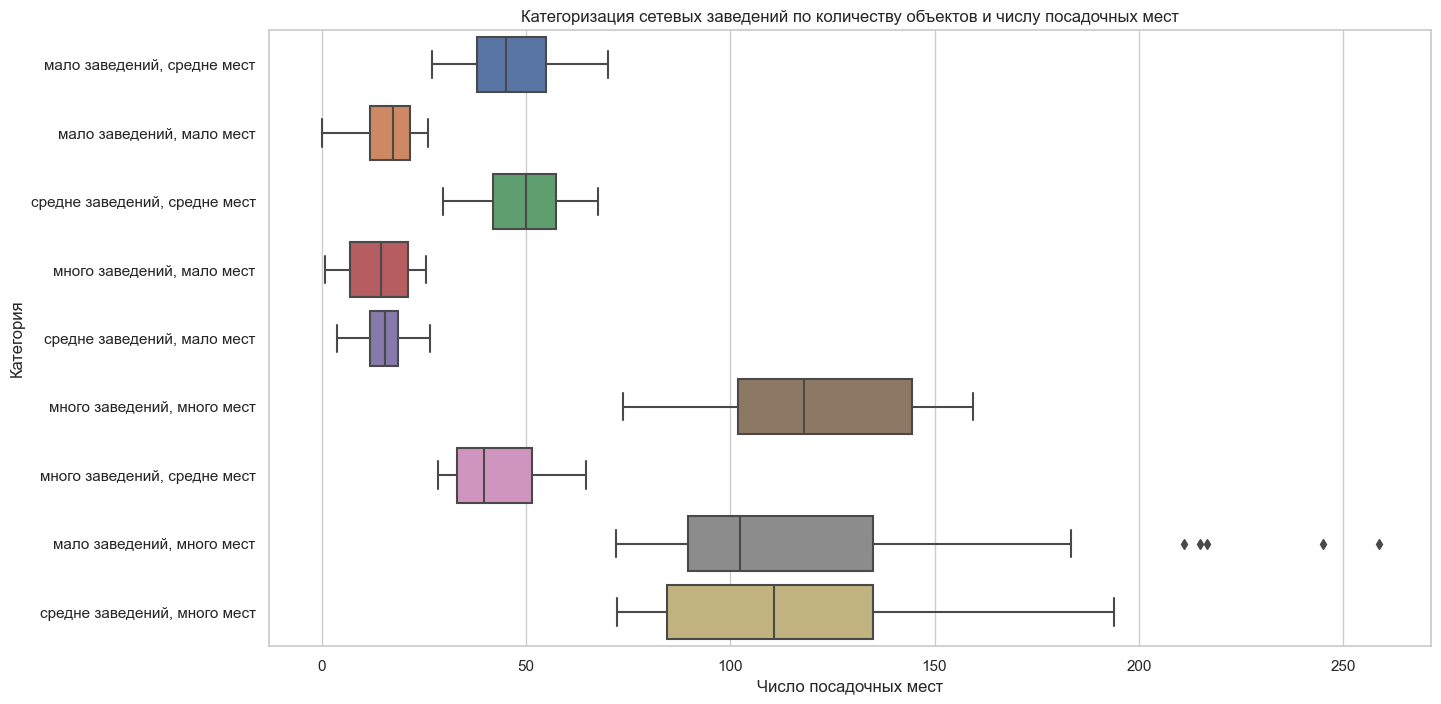

In [39]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='seats', y='category', data=chain_rest)
plt.ylabel('Категория')
plt.xlabel('Число посадочных мест')
plt.title('Категоризация сетевых заведений по количеству объектов и числу посадочных мест')
plt.show()

**Вывод v2:**

Из таблицы можно сделать вывод, что побеждают заведения в категории `мало заведений, много мест`, однако на графике диаграммы размаха категория `средне заведений, много мест` незначительно обгоняет её.

### Среднее количество посадочных мест

Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

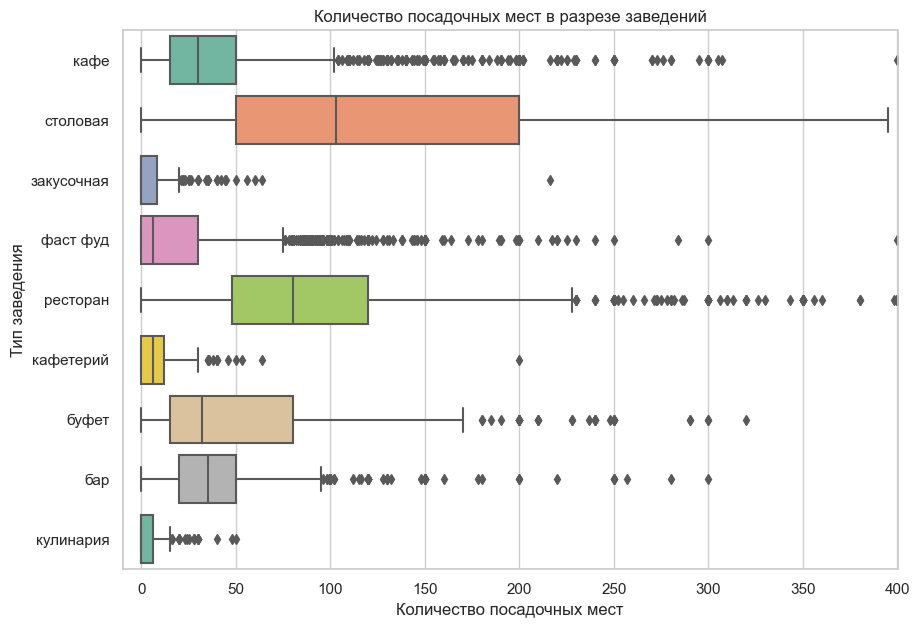

In [40]:
# Построю график ящик с усами с количеством посадочных мест в разрезе типов заведений:
plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x='number', y='object_type', data=rest, palette="Set2")
ax.set_xlim(-10, 400)
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('Тип заведения')
ax.set_title('Количество посадочных мест в разрезе заведений')

plt.show()

In [41]:
rest.groupby('object_type')['number'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,"2,581.00",130.36,95.23,0.00,50.00,103.00,200.00,"1,400.00"
ресторан,"2,155.00",100.19,96.47,0.00,48.00,80.00,120.00,"1,500.00"
бар,845.00,44.04,67.91,0.00,20.00,35.00,50.00,"1,700.00"
буфет,567.00,52.17,56.62,0.00,15.00,32.00,80.00,320.00
кафе,"6,159.00",38.91,36.72,0.00,15.00,30.00,50.00,533.00
кафетерий,353.00,8.88,14.20,0.00,0.00,6.00,12.00,200.00
фаст фуд,"2,111.00",23.05,40.29,0.00,0.00,6.00,30.00,580.00
закусочная,305.00,6.72,16.14,0.00,0.00,0.00,8.00,216.00
кулинария,203.00,4.63,8.60,0.00,0.00,0.00,6.00,50.00


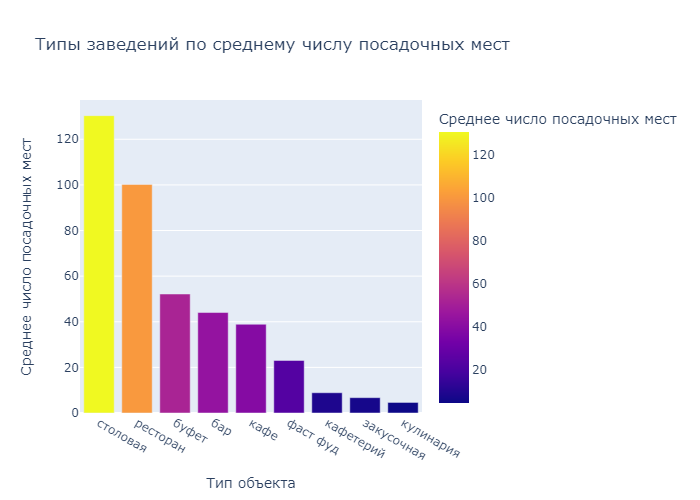

In [42]:
# Построю график столбчатой диаграмы
rest_avg_number = copy.deepcopy(rest)
rest_avg_number = rest_avg_number.groupby('object_type').agg({'number':'mean', 'object_name':'count'})\
    .sort_values(by='number', ascending=False).rename(columns={'object_name':'object_amount'}).reset_index()

ax = px.bar(rest_avg_number, x='object_type', y='number', color='number', 
            title='Типы заведений по среднему числу посадочных мест',
           labels={'object_type':'Тип объекта', 'number':'Среднее число посадочных мест'},
           hover_data=['object_amount'])

ax.show('png')

**Вывод:**

В среднем самое большое количество посадочных мест в столовых - 130 мест, что логично. На втором месте располагаются рестораны со средним значением 96 мест. Далее идёт группа заведений (буфеты, бары и кафе), в которых в районе 40-50 посадочных мест. Оставшиеся типы заведений существенно проигрывают (со значением 5-20 мест).

### Адрес

Выделите в отдельный столбец информацию об улице из столбца address .

In [43]:
street_only = []
streets = rest['address']
for street in streets:
    begin = street.find('город москва,')
    end = street.find(', дом')# | street.find(', владение') #or street.find(', владение'))
    street_only.append(street[begin+14:end])

rest['street_name'] = street_only
rest.head(3)

,object_name,chain,object_type,address,number,district,street_name
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,Ярославский район,улица егора абакумова
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,Таганский район,улица талалихина
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,NaN,абельмановская улица


In [44]:
rest['street_name'].unique()

array(['улица егора абакумова', 'улица талалихина',
       'абельмановская улица', ...,
       'поселение щаповское, улица евгения родионова, владение ',
       'поселение первомайское, деревня фоминское, лесная улица, владение 1',
       'каширское шоссе, владение 57'], dtype=object)

In [45]:
# В тех строках, где в адоресе вместо "дом" указано "владение", незвание улицы не сформировалось должным образом
rest.loc[rest['street_name'].str.contains("владение")].count()

object_name    303
chain          303
object_type    303
address        303
number         303
district        76
street_name    303
dtype: int64

In [46]:
# Таких строк 309 или 2% от датафрейма, чтобы не заморачиваться и не создавать костыли, удалю эти строки.
rest = rest.loc[~rest['street_name'].str.contains("владение")]
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14976 entries, 0 to 15278
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  14976 non-null  object
 1   chain        14976 non-null  object
 2   object_type  14976 non-null  object
 3   address      14976 non-null  object
 4   number       14976 non-null  int64 
 5   district     4879 non-null   object
 6   street_name  14976 non-null  object
dtypes: int64(1), object(6)
memory usage: 936.0+ KB


### Топ-10 улиц по количеству объектов питания

Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

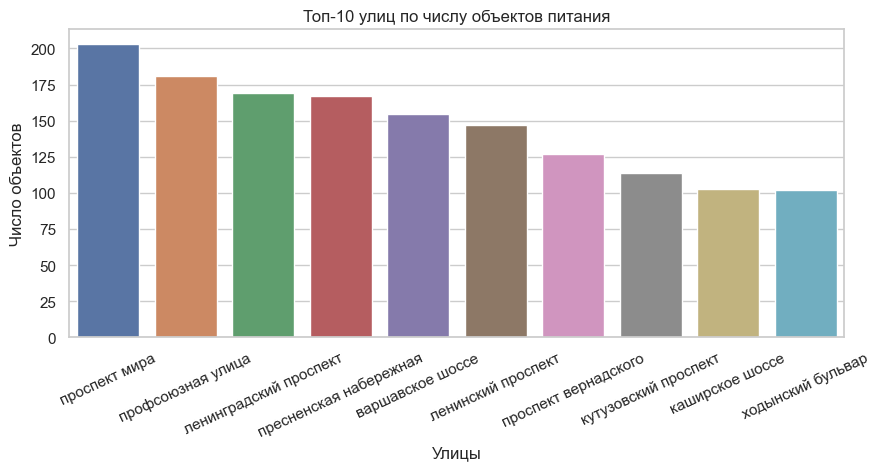

In [47]:
# Создам переменную, в которой сгруппирую датафрейм по наименованию улиц:
rest_streets = rest.groupby('street_name').agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)\
    .reset_index()

# Строю график столбчатой диаграммы:
ax = sns.barplot(x='street_name', y='object_name', data=rest_streets.head(10))

ax.set_xlabel('Улицы')
ax.set_ylabel('Число объектов')
ax.set_title('Топ-10 улиц по числу объектов питания')
plt.xticks(rotation=25)
plt.show()

In [48]:
# запишу топ-10 улиц в переменную:
top_ten_streets = copy.deepcopy(rest.groupby(['street_name'])\
    .agg({'object_name':'count'}).sort_values(by='object_name', ascending=False).reset_index()).head(10)

# переименую колонку с количеством объектов:
top_ten_streets = top_ten_streets.rename(columns={
    'object_name':'objects_count'
})

# Сгруппирую датафрейм по улице и району, чтобы добавить к топ-улицам все районы:
rest_grp = copy.deepcopy(rest.groupby(['street_name', 'district'])\
    .agg({'object_name':'count'}).sort_values(by='street_name').reset_index())

# Добавляю районы в датафрейм с самыми популярными улицами:
top_ten_streets = top_ten_streets.merge(rest_grp[['street_name', 'district']], on='street_name', how='left')

rest[rest['street_name'].isin(top_ten_streets['street_name'])]\
    .groupby(['street_name','district']).agg({'object_name' : 'count'}).reset_index()

,street_name,district,object_name
0,варшавское шоссе,Донской район,13
1,варшавское шоссе,Нагорный район,11
2,варшавское шоссе,район Нагатино-Садовники,1
3,варшавское шоссе,район Чертаново Северное,3
4,варшавское шоссе,район Чертаново Центральное,3
5,варшавское шоссе,район Чертаново Южное,11
6,каширское шоссе,район Москворечье-Сабурово,10
7,каширское шоссе,район Нагатино-Садовники,2
8,каширское шоссе,район Орехово-Борисово Северное,1
9,каширское шоссе,район Орехово-Борисово Южное,2


**Добавление координат улиц**

In [49]:
key = '86dda0d1-58ed-4f66-819f-1c7851c74461'
url = 'https://geocode-maps.yandex.ru/1.x/?apikey='

#ТОП-10 улиц по числу объектов общественного питания в формате списка:
address_list = rest_streets['street_name'].head(10).to_list()
coordinates = []

for address in address_list:
    req = requests.get(url + key + '&format=json&geocode=' + address + '&kind=metro&results=1').json()
    try:
        req = str(req)
        start = req.find("pos")+7
        req = req[start:]
        finish = req.find("'")
        req = req[:finish]
        coordinates.append(req)
    except:
        coordinates.append('Ошибка')  

In [50]:
# Получившийся список координат:
coordinates

['37.637937 55.812368',
 '37.532511 55.649525',
 '37.545635 55.794285',
 '37.539401 55.746335',
 '37.334783 55.350581',
 '30.238496 59.852081',
 '37.515353 55.681671',
 '37.509236 55.735038',
 '37.683203 55.641249',
 '37.531505 55.78486']

In [51]:
# Сформирую датафрейм с улицами и полученными координатами
top_ten_coord = pd.DataFrame({'street_name':address_list, 'coordinates': coordinates})
top_ten_coord['lat'] = top_ten_coord['coordinates'].str[10:]
top_ten_coord['long'] = top_ten_coord['coordinates'].str[:9]

# Добавлю количество объектов питания из изначального датафрейма
top_ten_coord = top_ten_coord.merge(rest_streets, on='street_name', how='left')
top_ten_coord = top_ten_coord.rename(columns={
    'object_name':'objects_count'
})

top_ten_coord

,street_name,coordinates,lat,long,objects_count
0,проспект мира,37.637937 55.812368,55.812368,37.637937,203
1,профсоюзная улица,37.532511 55.649525,55.649525,37.532511,181
2,ленинградский проспект,37.545635 55.794285,55.794285,37.545635,169
3,пресненская набережная,37.539401 55.746335,55.746335,37.539401,167
4,варшавское шоссе,37.334783 55.350581,55.350581,37.334783,155
5,ленинский проспект,30.238496 59.852081,59.852081,30.238496,147
6,проспект вернадского,37.515353 55.681671,55.681671,37.515353,127
7,кутузовский проспект,37.509236 55.735038,55.735038,37.509236,114
8,каширское шоссе,37.683203 55.641249,55.641249,37.683203,103
9,ходынский бульвар,37.531505 55.78486,55.78486,37.531505,102


**Вывод**

Топ-10 улиц находятся в следующих районах:

1.  Проспект мира - Алексеевский, Марьина роща, Мещанский, Останкинский, Ростокино, Свиблово и Ярославский
2.  Профсоюзная улица - Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
3.  Ленинградский проспект - Аэропорт, Беговой, Сокол и Хорошёвский
4.  Пресненская набережная - Пресненский район
5.  Варшавское шоссе - Северное Бутово, Южное Бутово, Донской, Нагатино-Садовники, Нагорный, Северное Чертаново, Центральное Чертаново и Южное Чертаново
6.  Ленинский проспект - Гагаринский и Донской
7.  Проспект Вернадского - Проспект Вернадского
8.  Кутузовский проспект - Дорогомилово и Фили-Давыдково
9.  Каширское шоссе - Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово и Южное Орехово-Борисово
10. Ходынский бульвар - Хорошёвский район

### Улицы с одним объектом питания

Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [52]:
one_object = copy.deepcopy(rest.groupby(['street_name'])\
    .agg({'object_name':'count'}).query('object_name == 1').reset_index())

# Добавляю районы в датафрейм:
one_object = one_object.merge(rest_grp[['street_name', 'district']], on='street_name', how='left')

one_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_name  683 non-null    object
 1   object_name  683 non-null    int64 
 2   district     275 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.3+ KB


Не ко всем улицам подтянулись районы, оставлю улицы с 1 заведением, где есть информация о районе и выведу ТОП-10 районов

In [53]:
one_object[~one_object['district'].isnull()].groupby('district')\
    .agg({'street_name':'count'}).sort_values(by='street_name', ascending=False).reset_index().head(10)

,district,street_name
0,Таганский район,16
1,Басманный район,12
2,район Хамовники,12
3,Тверской район,10
4,район Замоскворечье,8
5,Можайский район,8
6,Тимирязевский район,7
7,район Крюково,7
8,Мещанский район,7
9,район Южное Бутово,6


**Вывод:**

Улицы с единственным заведением общественного питания есть по всему городу: и в центре, и на окраине. Вероятно это связано с проходимостью людей и особенностями инфраструктуры вокруг.
Что удивительно, в центральные районы города (напр. Таганский, Хамовники и Тверской) оказались в данном топе. 

## Общий вывод:
<a id='section_id3'></a>
[Оглавление](#section_id)

Для анализа рынка заведений общественного питания Москвы использовал датафрейм с перечнем заведений города, их адресом и числом мест.

В ходе предобработки привёл названия колонок, названия заведений, адреса к нижнему регистру, дубликатов и пропусков не обнаружил. Однако в данных были несостыковки, заведения одной сети могли относиться к разным типам заведений. Вероятно дело в отсутствии чётких критериев и контролей при формировании данных.

Также на вход использовал внешний источник данных - аналогичный датасет с перечнем заведений, с указанием их координат, районов и округов. Районы подтянул к основному датафрейму по id.

---

Основной анализ и выводы:

1. Самые популярные заведения - кафе, их больше всего в городе. С одной стороны между ними наибольшая конкуренция, с другой стороны спрос рождает предложение, значит они пользуются наибольшим спросом среди жителей и гостей города.

2. Несетевых заведений больше сетевых - распределение 12 000 к 3 000 соответственно.

3. Сетевые заведения в основном - это кафе, фастфуд и рестораны. При чём в доле фастфуда половина заведений сетевые.

4. Более распространены сетевые заведения в категории малое количество объектов с большим количеством посадочных мест. 

5. В среднем самое большое количество посадочных мест в столовых - 130 мест, что логично. На втором месте располагаются рестораны со средним значением 96 мест. Далее идёт группа заведений (буфеты, бары и кафе), в которых в районе 40-50 посадочных мест. Оставшиеся типы заведений существенно проигрывают (со значением 5-20 мест).

6. При выделении адреса удалил 2% данных у которых вместо `дома` фигурирует `владение`. Несущественно для дальнейшего анализа.

7. Топ-10 улиц Москвы по числу объекто питания:
* проспект мира,
* профсоюзная улица,
* ленинградский проспект,
* пресненская набережная,
* варшавское шоссе,
* ленинский проспект,
* проспект вернадского,
* кутузовский проспект,
* каширское шоссе,
* ходынский бульвар

8. В Москве 683 улиц с одним объектом, улицы рассредоточены по всему городу: и в центре, и на окраине. Вероятно это связано с проходимостью людей и особенностями инфраструктуры вокруг.

[Ссылка на презентацию](https://drive.google.com/file/d/1XbBQCePdyg949KV_8-ZwwbvZba9NY22m/view?usp=sharing)